In [96]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import approximations as a
import distributions as d
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
a = reload(a)
d = reload(d)
sm = reload(dmlt)

Populating the interactive namespace from numpy and matplotlib


In [97]:
#Create a test model - classify based on gender from impedance magnitude position S
GenderFromZS = dmlt.ODFC(a.ComplexFourier,d.UnweightedGaussianClassification,5)

In [98]:
#Load the relevant data
GenderZSData = GenderFromZS.load("impedance_data/ImpedanceGender.csv","impedance_data/ImpedanceZS.csv",True,True)

#print sum(GenderZSData.getWeights(0))

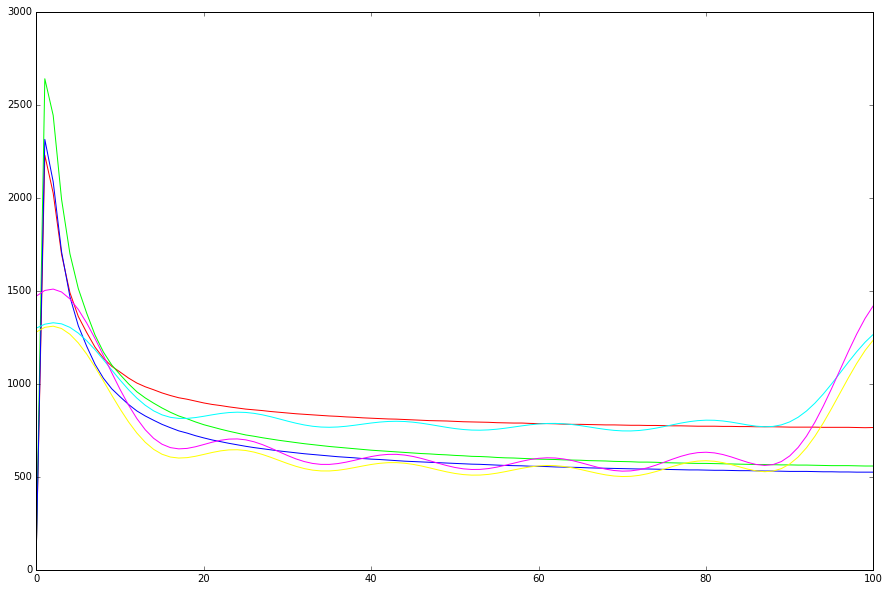

In [99]:
#Plot a few random rows of the data
GenderFromZS.plotSample(GenderZSData,0,'#ff0000')
GenderFromZS.plotSample(GenderZSData,5,'#00ff00')
GenderFromZS.plotSample(GenderZSData,10,'#0000ff')

#Also plot their approximations on top of them
GenderFromZS.plotApproximation(GenderZSData,0,'#00ffff')
GenderFromZS.plotApproximation(GenderZSData,5,'#ff00ff')
GenderFromZS.plotApproximation(GenderZSData,10,'#ffff00')

plt.show()

In [100]:
#Train and test the whole set
#GenderFromZS.train(GenderZSData)
#print GenderFromZS.test(GenderZSData)

#Pull out a subset
firstTen = GenderFromZS.train(GenderZSData,range(10))
print firstTen.getAllY()
#Check the probability they're male
#print GenderFromZS.predict(firstTen,["Male" for i in range(10)])
#And just classify them
print GenderFromZS.predict(firstTen)

['Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male']
[('Male', 0.0017208909120361284), ('Male', 0.0017215442479187957), ('Male', 0.0017105653274375168), ('Male', 0.0017149533020469284), ('Male', 0.0017216901008190227), ('Male', 0.0017185540880112996), ('Male', 0.0017162368737968267), ('Male', 0.0017155932952926118), ('Male', 0.0017098373998521838), ('Male', 0.0017202692078213233)]
